In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
latitude = (-35, 5)
longitude = (-75, -35)

# CHIRPS

In [3]:
chirps = xr.open_dataarray('dataset/CHIRPS/chirps-v2.0.monthly.nc')
chirps

<xarray.DataArray 'precip' (time: 507, latitude: 2000, longitude: 7200)>
[7300800000 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2023-03-01
Attributes:
    units:               mm/month
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

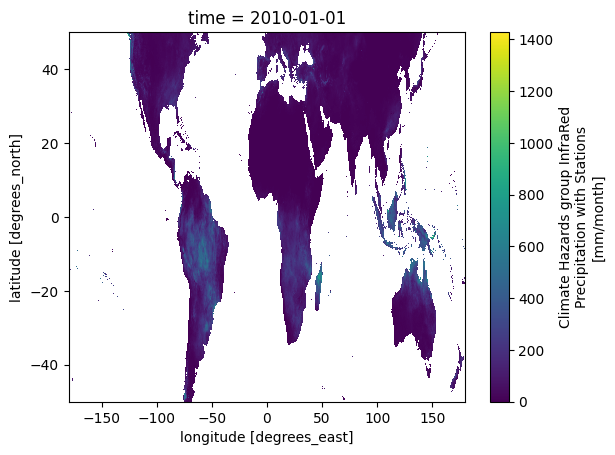

In [4]:
chirps.sel(time='2010-01').plot()

In [4]:
chirps_brasil = chirps.sel(latitude=slice(*latitude), longitude=slice(*longitude))
chirps_brasil

<xarray.DataArray 'precip' (time: 507, latitude: 800, longitude: 800)>
[324480000 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -34.97 -34.92 -34.88 ... 4.875 4.925 4.975
  * longitude  (longitude) float32 -74.98 -74.93 -74.88 ... -35.12 -35.07 -35.03
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2023-03-01
Attributes:
    units:               mm/month
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

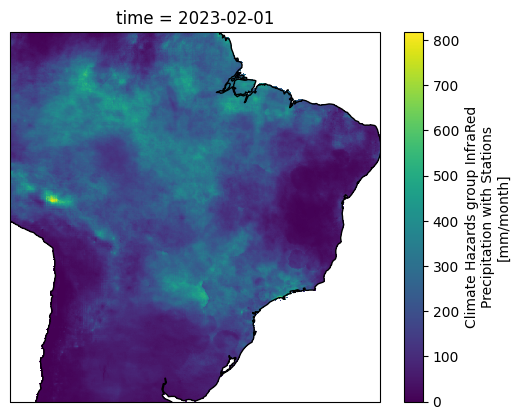

In [6]:
ax_low = plt.axes(projection=ccrs.PlateCarree())
ax_low.coastlines()
chirps_brasil.sel(time='2023-2').plot(ax=ax_low, transform=ccrs.PlateCarree())


# CMIP6

In [14]:
#open all files
cmip6 = xr.open_mfdataset('dataset/CNRM-CMIP6/*.nc', combine='by_coords')
cmip6 = cmip6.resample(time='1MS').mean()
cmip6 = cmip6.assign_coords(lon=(((cmip6.lon + 180) % 360) - 180))
cmip6 = cmip6.roll(lon=int(len(cmip6['lon']) / 2), roll_coords=True)
cmip6

<xarray.Dataset>
Dimensions:  (time: 408, lat: 600, lon: 1440)
Coordinates:
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2014-12-01
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-05T17:50:55.795886+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-05T17:50:55.795886+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       CNRM-CM6-1
    cmip6_institution_id:  CNRM-CERFACS
    cmip6_license:         CC-BY-SA 4.0

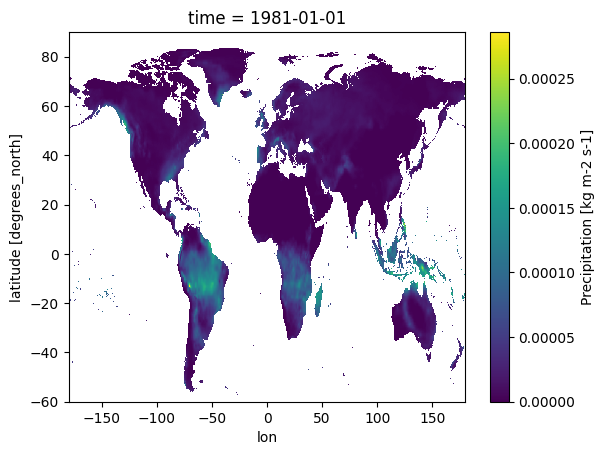

In [6]:
cmip6.sel(time='1981-01').pr.plot()

In [15]:
cmip6_brasil = cmip6.sel(lat=slice(*latitude), lon=slice(*longitude))
cmip6_brasil

<xarray.Dataset>
Dimensions:  (time: 408, lat: 160, lon: 160)
Coordinates:
  * lat      (lat) float64 -34.88 -34.62 -34.38 -34.12 ... 4.375 4.625 4.875
  * lon      (lon) float64 -74.88 -74.62 -74.38 -74.12 ... -35.62 -35.38 -35.12
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2014-12-01
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-05T17:50:55.795886+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-05T17:50:55.795886+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       CNRM-CM6-1
    cmip6_institution_id:  CNRM-CERFACS
    cmip6_license:         CC-BY-SA 4.0

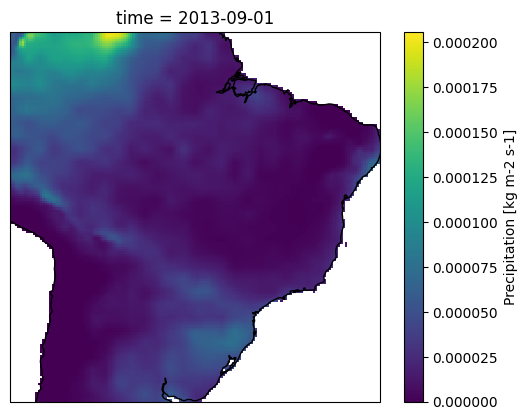

In [11]:
ax_low = plt.axes(projection=ccrs.PlateCarree())
ax_low.coastlines()
cmip6_brasil.sel(time='2013-9').pr.plot(ax=ax_low, transform=ccrs.PlateCarree())

# High-low npy

In [20]:
from chirps_cmip6 import ChirpsCmip6

dataset = ChirpsCmip6(data_dir="dataset/high-low", type='train')


MovieWriter imagemagick unavailable; using Pillow instead.


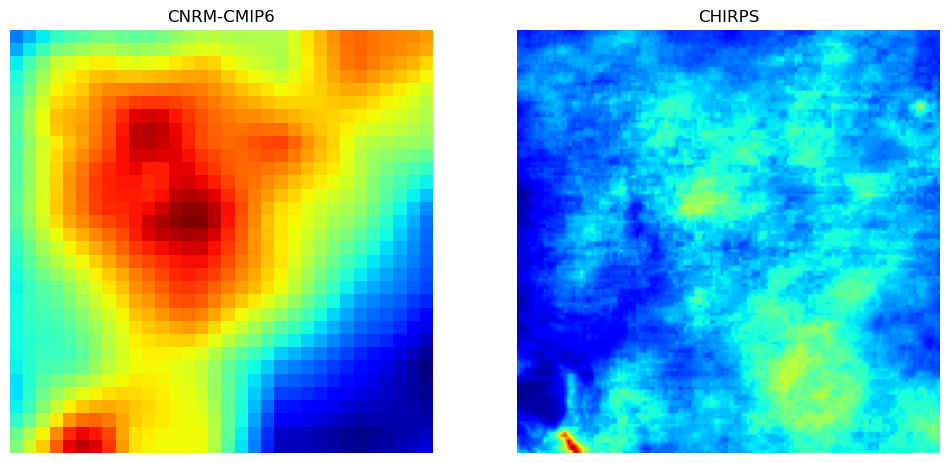

In [36]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, (ax_low_res, ax_high_res) = plt.subplots(1, 2, figsize=(12, 6))
ax_low_res.set_axis_off()
ax_high_res.set_axis_off()

def animate(i):
    low_res_image = dataset[i][1]  # Imagem de baixa resolução
    high_res_image = dataset[i][0]  # Imagem de alta resolução

    ax_low_res.imshow(low_res_image, cmap='jet')
    ax_high_res.imshow(high_res_image, cmap='jet')

    ax_low_res.set_title('CNRM-CMIP6')
    ax_high_res.set_title('CHIRPS')

    return ax_low_res, ax_high_res

anim = animation.FuncAnimation(fig, animate, frames=30, interval=2000)
anim.save('../image/dataset.gif', dpi=80, writer='imagemagick')
